In [2]:
import json
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import image 

In [7]:
data_dir = "./showcase/data/"
save_to = "./showcase/"
data_path = os.path.join(data_dir, '3_{}/signal.json') 
img_path = os.path.join(save_to, 'plots_peak/3_{}') 
twoplot_path = os.path.join(save_to, 'plots_peak_test/3_{}')

for i in [4,5,7,8]:
    with open(data_path.format(i), 'r') as f:
        data = json.load(f)
    df = pd.DataFrame.from_dict(data)

    num_output = 0
    if not os.path.exists(img_path.format(i)):
        os.makedirs(img_path.format(i))
    if not os.path.exists(twoplot_path.format(i)):
        os.makedirs(twoplot_path.format(i))

    for index in df.head():
        for index_2 in ['L', 'R']:
            temp = np.array(df[index][index_2])
            if temp.size==1:
                print("empt")
                continue

            plt.plot(temp)
            plt.savefig(twoplot_path.format(i) + '/%s_%s.png' % (index, index_2))

            model = LinearRegression()
            # the signal 𝐱  is first linearly detrended, i.e., the least-squares fit of a straight line to x is calculated and subtracted from x.
            
            x = np.arange(temp.shape[0]).reshape(-1, 1)
            model.fit(x, temp)
            trend = model.predict(x)
            #print("The raw data mean: ", temp.mean(), "   ")
            temp = temp - trend

            with open(img_path.format(i) + '/%s_%s.npy' % (index, index_2), 'wb') as f:
                np.save(f, temp)
            
            #print("The de-trended mean: ", temp.mean(), "\n")
            plt.plot(temp)
            plt.savefig(img_path.format(i) + '/%s_%s.png' % (index, index_2))
            plt.close()
        num_output += 1
        if num_output >= 10:
            break

visualise the detrended series:

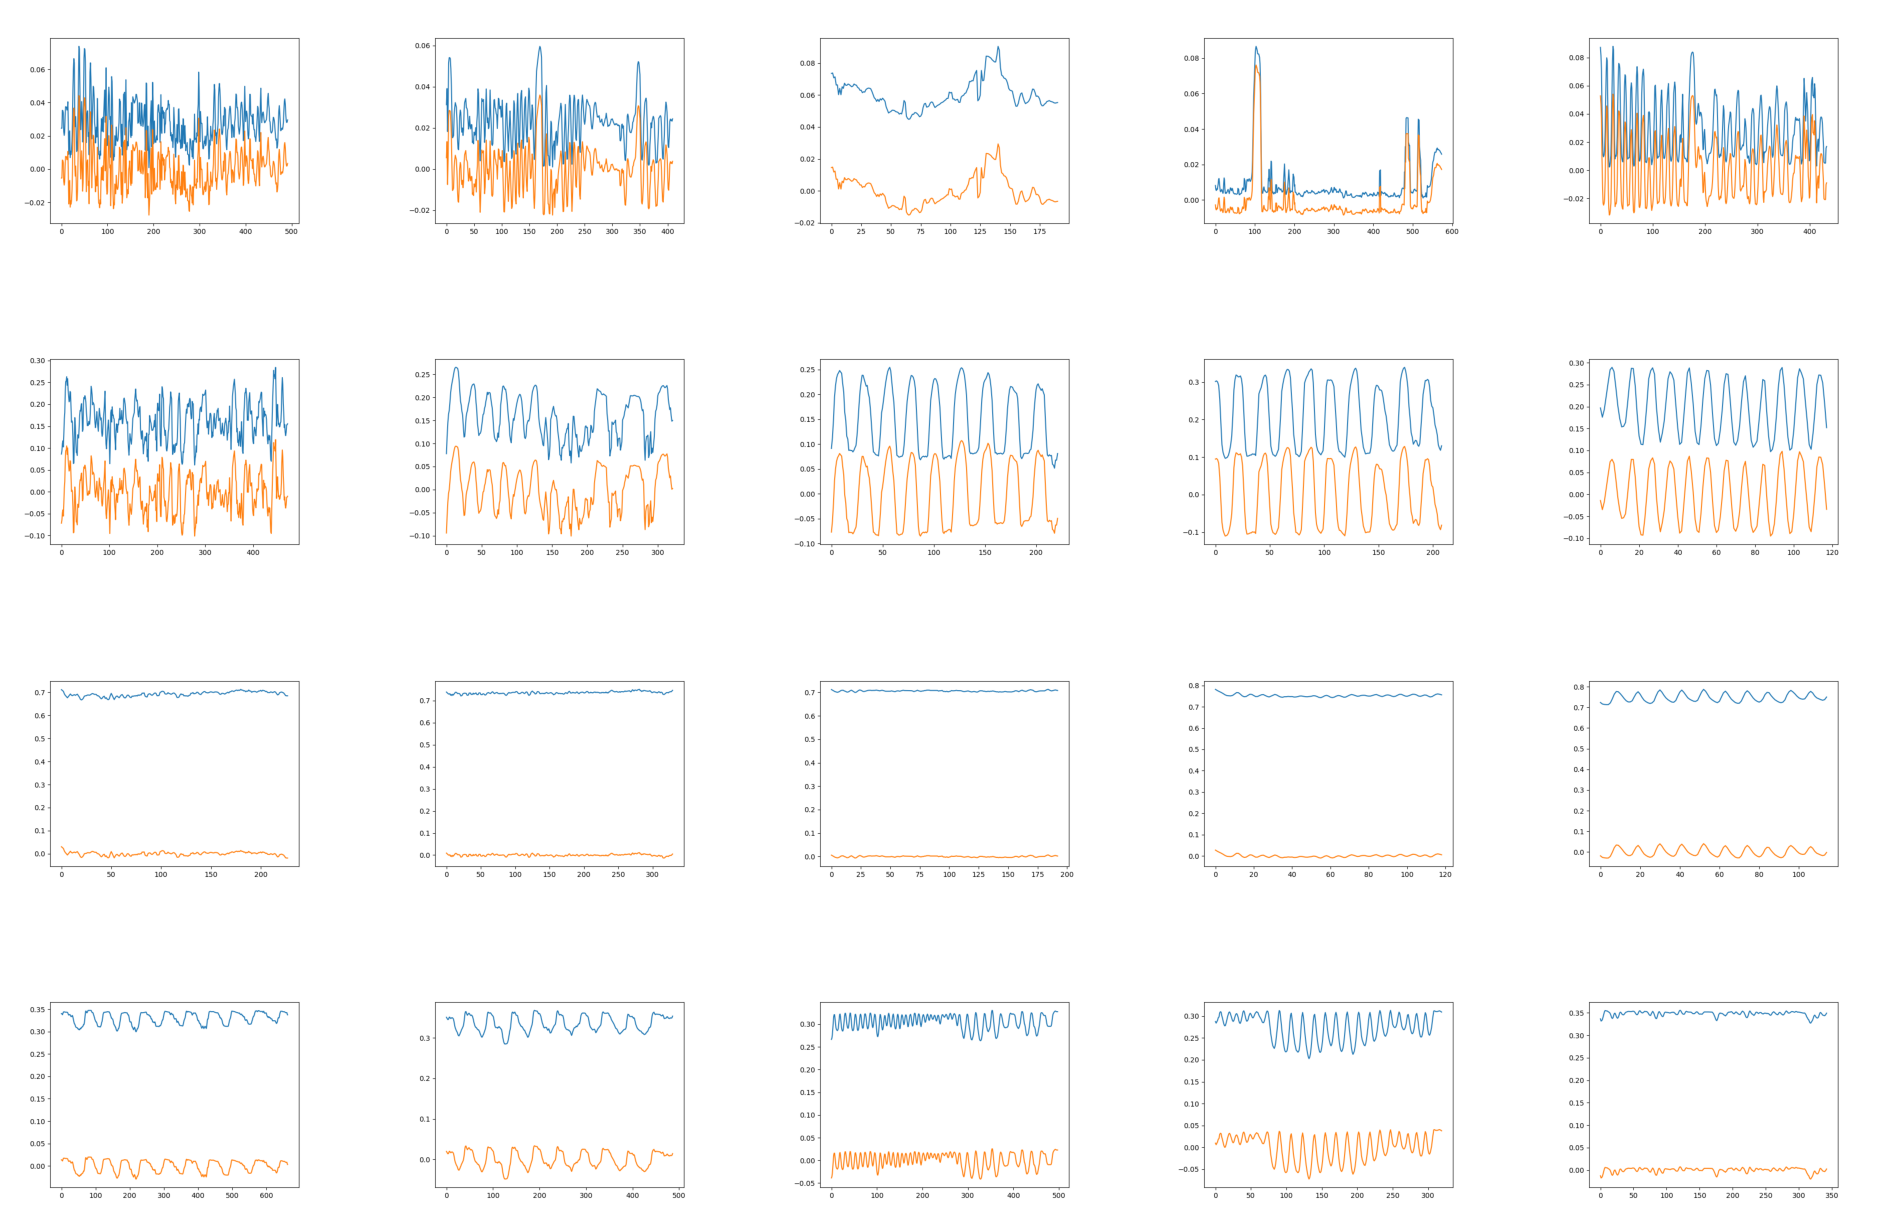

In [46]:
import os
import matplotlib.pyplot as plt
from PIL import Image

def display_images_from_folder(folder_path, num_images=5):
    
    png_files = [file for file in os.listdir(folder_path) if file.endswith(".png")]

    for i, file in enumerate(png_files[:num_images]):
        image_path = os.path.join(folder_path, file)
        image = Image.open(image_path)
        yield image


folder_path = "./showcase"
paths = []

for i in [4, 5, 7, 8]:
    filename = os.path.join(folder_path, 'plots_peak', f'3_{i}')  
    paths.append(filename)

num_images_per_folder = 5

num_rows = len(paths)
num_cols = num_images_per_folder
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 16))

for i, folder_path in enumerate(paths):
    images_gen = display_images_from_folder(folder_path, num_images_per_folder)
    for j, image in enumerate(images_gen):
        axes[i, j].imshow(image)
        axes[i, j].axis('off')

plt.show()
